In [ ]:
import numpy as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [ ]:
x0  = [1,2,3,3,4, 5]
x1  = [1,1,2,4,3,4]
y   = [0,0,0,1,1,1]
data = pd.DataFrame({'x0':x0, 'x1':x1, 'y':y})
data

,x0,x1,y
0,1,1,0
1,2,1,0
2,3,2,0
3,3,4,1
4,4,3,1
5,5,4,1


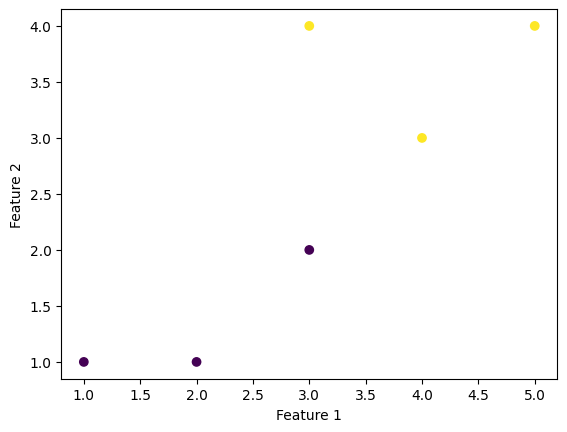

In [ ]:
plt.scatter(x0, x1, c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
y = data['y']
X = data.drop('y', axis=1).values

In [ ]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
print(y_pred)
print(y.values)

[0 0 0 1 1 1]
[0 0 0 1 1 1]


In [ ]:
print(model.coef_)
print(model.intercept_)

[[0.62208999 0.96446563]]
[-4.34551942]


In [ ]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)

In [ ]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [ ]:
print(accuracy)
print(precision)
print(recall)
print(f1)

1.0
1.0
1.0
1.0


Naive Bayes Pipeline

In [ ]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


Load Datasets

In [ ]:
iris = datasets.load_iris()


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
df = df.drop(['petal length (cm)',
             'petal width (cm)'], axis=1)

In [ ]:
df.head(2)

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0


Seperate Features and Labels

In [ ]:
X = df.drop('target', axis=1)
y = df['target']


Perform Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.unique()

array([0, 1, 2])

Initialize Gaussian Naive Bayes Model

In [ ]:
naive_bayes = GaussianNB()

Fit on Train Data

In [ ]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

Predict on Test Data

In [ ]:
y_pred = naive_bayes.predict(X_test)

Model Evaluation

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
metrics = {
    'Metric':[' Accuracy','precision','recall', 'F1 score'],
    'Value':[test_accuracy, test_precision, test_recall, test_f1]
}
metrics_df = pd.DataFrame(metrics)

In [ ]:
metrics_df

,Metric,Value
0,Accuracy,0.900000
1,precision,0.901389
2,recall,0.900000
3,F1 score,0.899233


**CHURN DATA**

In [ ]:
data=pd.read_csv('churn_data.csv', index_col=False)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(2966)

In [ ]:
data = data[~duplicated_rows]

In [ ]:
data.shape

(12033, 10)

In [ ]:
data.isna()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14067,False,False,False,False,False,False,False,False,False,False
14154,False,True,False,False,False,False,False,False,False,False
14164,False,False,False,False,False,False,False,False,False,False
14176,False,False,True,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
satisfaction,9
evaluation,60
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


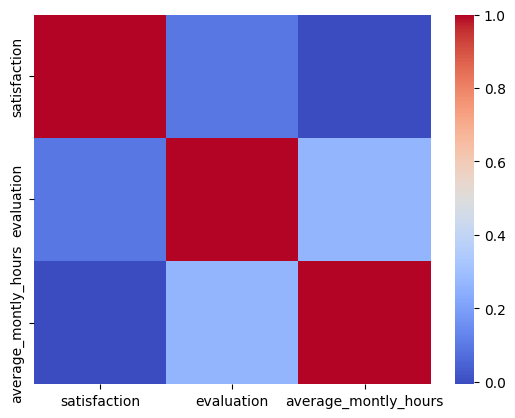

In [ ]:
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [ ]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [ ]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['satisfaction', 'evaluation', 'average_montly_hours']
Categorical columns are
['number_of_projects', 'time_spend_company', 'work_accident', 'churn', 'promotion', 'department', 'salary']


In [ ]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

NameError: name 'num_cols' is not defined

In [ ]:
num_df.isna().sum()

,0
satisfaction,0
evaluation,0
average_montly_hours,0


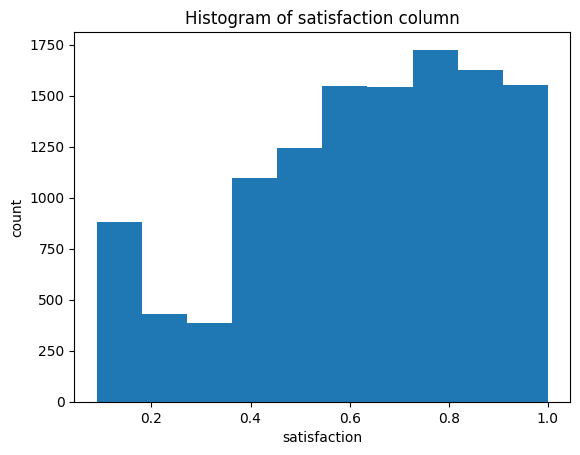

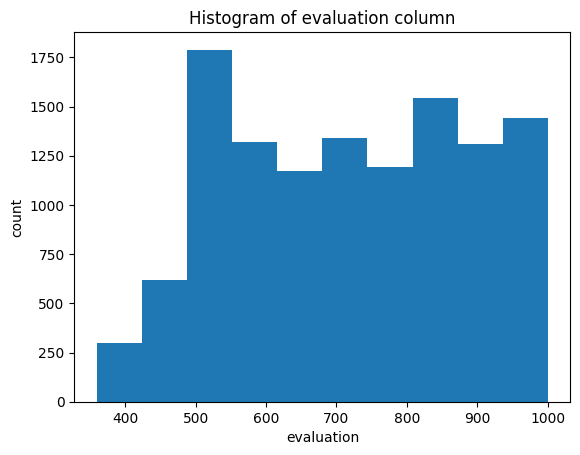

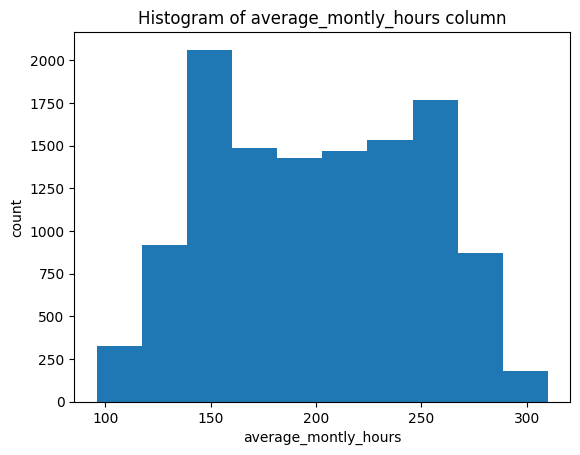

In [ ]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [ ]:
for col in cat_cols:
    print(cat_df[col].mode())

0    four
Name: number_of_projects, dtype: object
0    3+
Name: time_spend_company, dtype: object
0    no
Name: work_accident, dtype: object
0    no
Name: churn, dtype: object
0    no
Name: promotion, dtype: object
0    sales
Name: department, dtype: object
0    low
Name: salary, dtype: object


In [ ]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [ ]:
cat_df.isna().sum()

,0
number_of_projects,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


In [ ]:
#churn_index = cat_df.columns.get_loc('churn')


In [ ]:
#scale_cat_df = cat_df.iloc[:, [i for i in range(len(cat_df.columns)) if i != churn_index]]

In [ ]:
#scale_cat_df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,no,sales,low
1,0.80,860.0,five,262.0,6+,no,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,no,sales,low
4,0.37,520.0,two,159.0,3+,no,no,sales,low
...,...,...,...,...,...,...,...,...,...
14067,0.81,920.0,four,268.0,3+,no,no,sales,low
14154,0.85,NaN,three,245.0,10+,no,no,accounting,medium
14164,0.48,720.0,three,143.0,4+,no,no,sales,medium
14176,0.84,810.0,NaN,236.0,3+,yes,no,IT,low


In [ ]:
num_df = pd.DataFrame(num_df, columns=num_cols)

In [ ]:
num_df.head(2)


,satisfaction,evaluation,average_montly_hours
0,0.38,530.0,157.0
1,0.80,860.0,262.0


In [ ]:
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

In [ ]:
num_df.head(2)


,satisfaction,evaluation,average_montly_hours
0,0.318681,0.265625,157.0
1,0.780220,0.781250,262.0


In [ ]:
cat_df.head(2)


,number_of_projects,time_spend_company,work_accident,churn,promotion,department,salary
0,two,3+,no,yes,no,sales,low
1,five,6+,no,yes,no,sales,medium


In [ ]:
cat_cols = cat_df.columns.tolist()


In [ ]:
for col in cat_cols:
  print(cat_df[col].value_counts())

number_of_projects
four     3705
three    3533
five     2236
two      1584
six       830
seven     145
Name: count, dtype: int64
time_spend_company
3+     5202
2+     2920
4+     2011
5+     1064
6+      545
10+     113
7+       96
8+       82
Name: count, dtype: int64
work_accident
no     10174
yes     1859
Name: count, dtype: int64
churn
no     10037
yes     1996
Name: count, dtype: int64
promotion
no     11828
yes      205
Name: count, dtype: int64
department
sales          3264
technical      2247
support        1825
IT              979
RandD           694
product_mng     686
marketing       675
accounting      622
hr              601
management      440
Name: count, dtype: int64
salary
low       5760
medium    5278
high       995
Name: count, dtype: int64


In [ ]:
df = pd.DataFrame(data)


cat_df['number_of_projects'] = cat_df['number_of_projects'].map({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5})
cat_df['time_spend_company'] = cat_df['time_spend_company'].astype(str).str.replace('+', '').astype(int)
cat_df['work_accident'] = cat_df['work_accident'].map({'no': 0, 'yes': 1})
cat_df['churn'] = cat_df['churn'].map({'no': 0, 'yes': 1})
cat_df['promotion'] = cat_df['promotion'].map({'no': 0, 'yes': 1})
cat_df['salary'] = cat_df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [ ]:
if 'department' in cat_df.columns:
  cat_df = pd.get_dummies(cat_df, columns=['department'])
else:
  print("Column 'department' not found in the DataFrame. It might have already been processed.")

In [ ]:
cat_df

,number_of_projects,time_spend_company,work_accident,churn,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2.0,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,5.0,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,NaN,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,5.0,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,2.0,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14067,4.0,3,0,0,0,0,False,False,False,False,False,False,False,True,False,False
14154,3.0,10,0,0,0,1,False,False,True,False,False,False,False,False,False,False
14164,3.0,4,0,0,0,1,False,False,False,False,False,False,False,True,False,False
14176,4.0,3,1,0,0,0,True,False,False,False,False,False,False,False,False,False


In [ ]:
data = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
data

,satisfaction,evaluation,average_montly_hours,number_of_projects,time_spend_company,work_accident,churn,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.318681,0.265625,157.0,2.0,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.780220,0.781250,262.0,5.0,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.021978,0.812500,272.0,NaN,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.692308,0.796875,223.0,5.0,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.307692,0.250000,159.0,2.0,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14067,0.791209,0.875000,268.0,4.0,3,0,0,0,0,False,False,False,False,False,False,False,True,False,False
14154,0.835165,0.562500,245.0,3.0,10,0,0,0,1,False,False,True,False,False,False,False,False,False,False
14164,0.428571,0.562500,143.0,3.0,4,0,0,0,1,False,False,False,False,False,False,False,True,False,False
14176,0.824176,0.703125,236.0,4.0,3,1,0,0,0,True,False,False,False,False,False,False,False,False,False
